### Importing Libraries and Packages

In [1]:
!pip install sklearn_evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 860.7 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 4.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.5 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
plotpar = {'axes.labelsize': 17,
           'font.size': 12,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False}
plt.rcParams.update(plotpar)

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn_evaluation import plot
from sklearn.metrics import accuracy_score, precision_recall_curve,classification_report, confusion_matrix, multilabel_confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, log_loss
from sklearn.model_selection import GridSearchCV
from astropy.table import Table

Deploy Shiny apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrainingSet/combined.csv')
df

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved
0,429535384479232,45.084708,1.417250,10.251890,0.598249,4.920000,87,NaN,0,1,0
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0
2,997948536825216,46.696083,2.714472,7.990882,0.185992,2.487000,41,NaN,0,1,0
3,1268325318000128,44.312083,1.887583,8.011133,0.769515,1.745000,100,NaN,0,1,0
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0
277592,5140693571158739840,24.771554,-17.948300,10.507542,3.752956,12.367461,9,NaN,1,0,0
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0
277594,3864972938605115520,164.103190,7.002727,11.038391,4.184836,0.835335,3,NaN,1,0,0


In [6]:
drop_list = ['source_id', 'ra','dec','Single', 'unresolved','resolved']
label_list=['resolved']

In [7]:
tbl = df[(~df['ruwe'].isnull()) * (~df['phot_g_mean_mag'].isnull()) * (~df['bp_rp'].isnull()) * (~df['rv_amplitude_robust'].isnull())]

np.sum(tbl.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
source_id,0
ra,0
dec,0
phot_g_mean_mag,0
bp_rp,0
ruwe,0
ipd_frac_multi_peak,0
rv_amplitude_robust,0
Single,0
unresolved,0


In [9]:
_tbl = tbl.sample(frac =1, random_state = 42) #shuffle 1 -> 100% of rows

min_value = min(np.sum(_tbl['resolved']), np.sum(_tbl['unresolved']))
min_value

16086

In [10]:
tbl

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0
5,2543861884981632,47.310542,3.242750,8.123917,0.066383,0.898000,85,7.278629,0,1,0
6,3461301259765120,46.152792,4.126389,10.542889,1.233669,3.357000,99,3.101049,0,1,0
8,4645750160709248,42.836708,3.056833,7.312822,0.467812,0.965000,0,5.134388,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
277585,4810594479418041856,77.959937,-45.043813,8.063552,2.026646,1.170168,0,0.856018,1,0,0
277588,4848140361962951552,54.003394,-44.514362,10.995456,3.665376,1.192231,8,2.575779,1,0,0
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0


### Imbalanced DataSet Handling

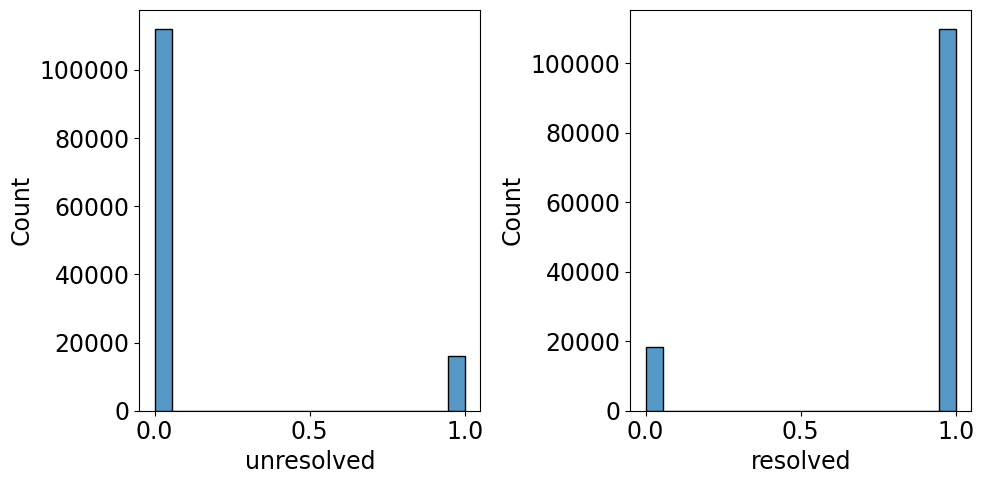

In [11]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (10,5))

sns.histplot(data = tbl, x = tbl['unresolved'], ax= ax[0], label = 'unresolved'), sns.histplot(data = tbl, x = tbl['resolved'], ax= ax[1], label = 'resolved')
plt.tight_layout()

# Sampling Data so that we have a good proportion of each datapoints.

In [12]:
sampled_zeros = tbl[tbl['resolved'] == 0].sample(n=min_value, random_state=42)
sampled_ones = tbl[tbl['resolved'] == 1].sample(n=min_value, random_state=42)

# Concatenation Tables
sampled_data = pd.concat([sampled_zeros, sampled_ones])

mask = (sampled_data['resolved'] == 0) * (sampled_data['unresolved'] == 0)
sampled_data = sampled_data[~mask]
sampled_data

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved
397,100593567206719488,31.559667,22.108778,9.561438,0.825387,7.763,68,5.477423,0,1,0
21209,5532961588660837248,119.529083,-43.909972,11.793299,0.352797,1.091,0,45.514530,0,1,0
17290,4544586878233774976,255.864333,13.752972,9.883394,1.264428,1.099,0,1.568283,0,1,0
12732,3140656047354521600,108.031250,5.474361,5.846698,1.313888,2.528,81,0.495304,0,1,0
1158,291606323525588224,26.729333,25.839528,9.393265,1.382320,0.926,0,0.823898,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
164157,2124530758654980480,273.789292,52.156889,8.653087,0.372519,0.980,0,8.540007,0,0,1
210210,5350424039791830784,162.181364,-59.448038,11.358040,1.750512,0.789,0,3.731660,0,0,1
243503,1085670670464728064,112.638000,58.596556,11.726561,1.182379,1.322,0,4.995289,0,0,1
225814,871488141835896320,112.745708,25.166222,9.587990,0.696629,2.502,1,22.836849,0,0,1


In [13]:
np.sum(sampled_data.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
source_id,0
ra,0
dec,0
phot_g_mean_mag,0
bp_rp,0
ruwe,0
ipd_frac_multi_peak,0
rv_amplitude_robust,0
Single,0
unresolved,0


In [14]:
sampled_data['resolved'].sum(), sampled_data['unresolved'].sum()

(16086, 14203)

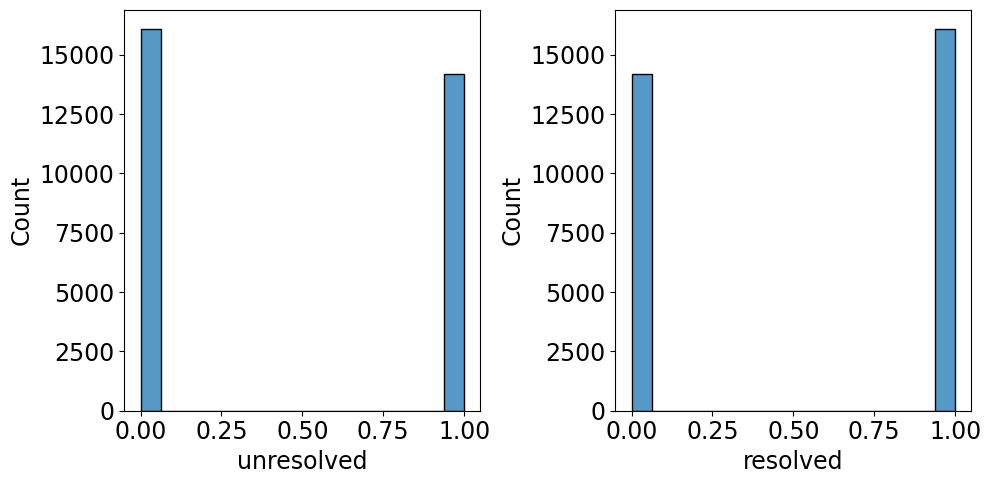

In [15]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (10,5))

sns.histplot(data = sampled_data, x = sampled_data['unresolved'], ax= ax[0], label = 'unresolved'), sns.histplot(data = sampled_data, x = sampled_data['resolved'], ax= ax[1], label = 'resolved')
plt.tight_layout()

In [16]:
X =  sampled_data.drop(labels=drop_list, axis=1)
y = sampled_data[label_list]

print(X)
print(y)

        phot_g_mean_mag     bp_rp   ruwe  ipd_frac_multi_peak  \
397            9.561438  0.825387  7.763                   68   
21209         11.793299  0.352797  1.091                    0   
17290          9.883394  1.264428  1.099                    0   
12732          5.846698  1.313888  2.528                   81   
1158           9.393265  1.382320  0.926                    0   
...                 ...       ...    ...                  ...   
164157         8.653087  0.372519  0.980                    0   
210210        11.358040  1.750512  0.789                    0   
243503        11.726561  1.182379  1.322                    0   
225814         9.587990  0.696629  2.502                    1   
152446        10.079119  0.680435  1.095                    0   

        rv_amplitude_robust  
397                5.477423  
21209             45.514530  
17290              1.568283  
12732              0.495304  
1158               0.823898  
...                     ...  
164157   

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

X_train_copy = X_train
X_test_scaled = X_test
X_test_scaled

,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust
175688,10.476242,0.085899,0.944,0,107.483963
261142,12.557627,1.399961,1.185,1,8.624620
18491,10.592896,0.733250,1.410,0,28.075293
266055,11.164777,0.802640,0.756,0,15.702621
23356,10.865388,0.816630,0.859,0,5.742638
...,...,...,...,...,...
64854,11.918943,0.716146,0.985,0,7.936540
14451,10.433366,1.082307,11.011,73,14.211166
74511,12.546270,2.349982,0.966,0,2.381994
19281,10.624551,0.405783,6.436,0,18.238291


# Standardize features using StandardScaler() which remove the mean and scaling to unit variance


In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test_scaled)

X_train.shape, X_test_scaled.shape, X_train, X_test_scaled

((20293, 5),
 (9996, 5),
 array([[-0.56330909, -0.96868925, -0.00426272, -0.3510359 , -0.39128553],
        [ 0.02659834, -1.13635892, -0.39520774, -0.3510359 ,  0.42057992],
        [-1.86248713, -0.14038927, -0.27293687, -0.3510359 ,  0.59205298],
        ...,
        [ 0.87227475,  0.22834295, -0.36584664, -0.3510359 , -0.36104458],
        [ 0.29535252,  1.03547249, -0.35378044, -0.3510359 , -0.4831449 ],
        [ 0.27698049, -0.55598955, -0.38897353, -0.3510359 ,  0.03684941]]),
 array([[ 0.10737619, -1.5888551 , -0.37670623, -0.3510359 ,  2.8276535 ],
        [ 1.30576112,  0.73950792, -0.32824031, -0.2948882 , -0.26650934],
        [ 0.17454127, -0.44182541, -0.28299204, -0.3510359 ,  0.34227022],
        ...,
        [ 1.29922218,  2.42283319, -0.37228195, -0.3510359 , -0.46189504],
        [ 0.19276706, -1.02205834,  0.72775367, -0.3510359 ,  0.03438546],
        [-0.98167879, -0.09343793, -0.23874929, -0.3510359 , -0.47899984]]))

# Mult-Layer Perceptron Classifier() Model

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 128, 64, 32),
                    max_iter=1, random_state=42)

num_epochs = 10

loss_vals = []
accuracies = []
roc_data = {}

for epoch in range(num_epochs):
    # Training
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    acc_score = accuracy_score(y_train, mlp.predict(X_train))

    loss_vals.append(mlp.loss_)
    accuracies.append(acc_score)

    # ROC curve data
    y_prob = mlp.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC data for this epoch in dictionary
    roc_data[epoch] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {mlp.loss_:.4f}, Accuracy Score: {acc_score:.4f}")

# Make predictions on the test data
y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# Calculating the average accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the average log loss of the model
_log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {_log_loss_value:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/10, Loss: 0.6062, Accuracy Score: 0.6865


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 2/10, Loss: 0.5731, Accuracy Score: 0.6985


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 3/10, Loss: 0.5686, Accuracy Score: 0.6998


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 4/10, Loss: 0.5666, Accuracy Score: 0.7025


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 5/10, Loss: 0.5648, Accuracy Score: 0.7057


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 6/10, Loss: 0.5636, Accuracy Score: 0.7069


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 7/10, Loss: 0.5625, Accuracy Score: 0.7083


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 8/10, Loss: 0.5615, Accuracy Score: 0.7089


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 9/10, Loss: 0.5607, Accuracy Score: 0.7101


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 10/10, Loss: 0.5599, Accuracy Score: 0.7104
Accuracy: 0.71
Log Loss: 0.56


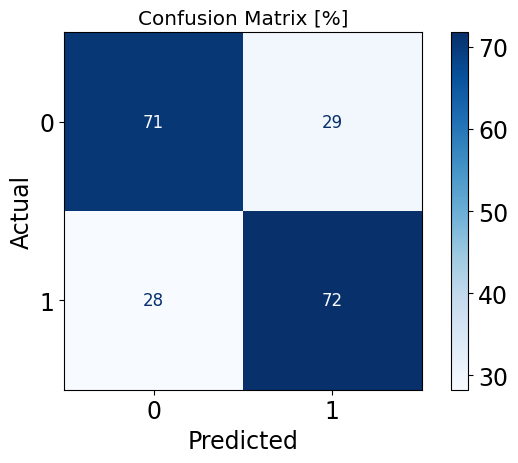

In [20]:
# the confusion matrix using test set and prediction data
cm = confusion_matrix(y_test, y_pred)

# calculating in percentage
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm_normalized, display_labels = np.unique(y_test) )
disp.plot(cmap='Blues')

plt.title('Confusion Matrix [%]')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/cm.png')


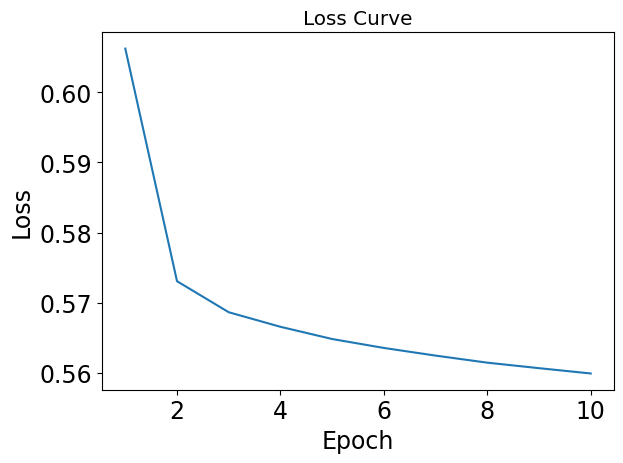

In [21]:
# Loss curve
plt.figure()
plt.plot(range(1, num_epochs + 1), loss_vals)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/loss.png')


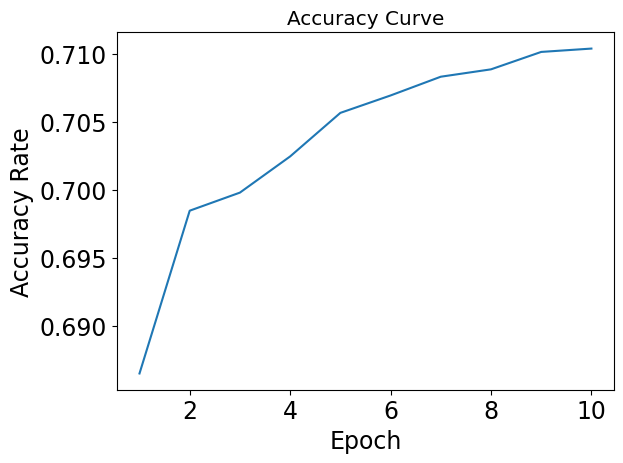

In [22]:
# Accuracy curve
plt.figure()
plt.plot(range(1, num_epochs + 1), accuracies)
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Rate')
plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy.png')

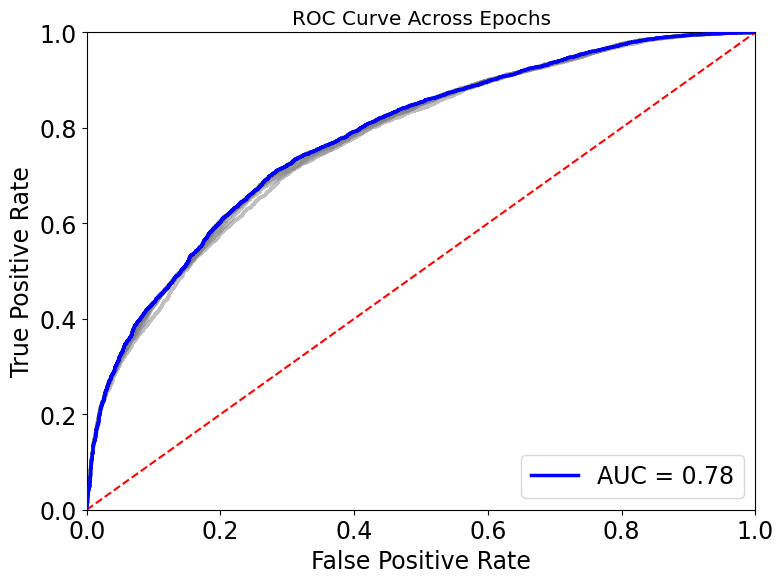

In [23]:
# Plot ROC curve across epochs
final_epoch = max(roc_data.keys())

plt.figure(figsize=(8, 6))

for epoch in range(num_epochs):
    plt.plot(
        roc_data[epoch]['fpr'],
        roc_data[epoch]['tpr'],
        color='gray',
        linewidth=2.5,
        alpha=0.5,
        zorder=1
    )

# Plot the final epoch
plt.plot(
    roc_data[final_epoch]['fpr'],
    roc_data[final_epoch]['tpr'],
    label=f'AUC = {roc_data[final_epoch]["auc"]:.2f}',
    color='blue',
    linewidth=2.5,
    zorder=final_epoch + 1
)

# Plotting
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Across Epochs')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

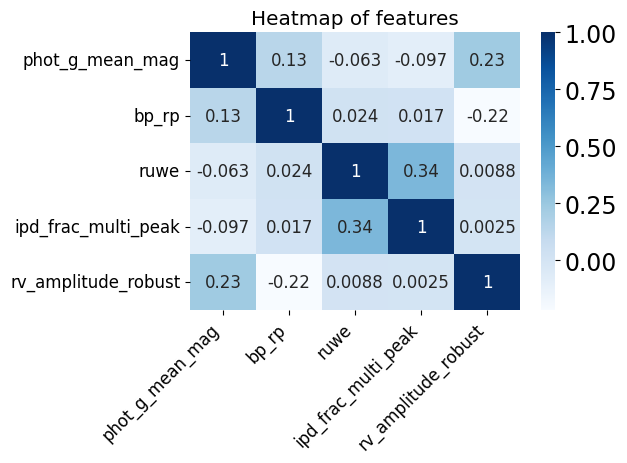

In [24]:
correlation = X_train_copy.corr()
sns.heatmap(correlation, cmap = 'Blues', annot=True)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)
plt.title('Heatmap of features')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/heatmap.png')

##Cross Validation using Stratified Kfolds

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 1/10, Loss: 0.6256, Train Accuracy: 0.6142, Validation Accuracy: 0.6099


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 2/10, Loss: 0.6073, Train Accuracy: 0.6386, Validation Accuracy: 0.6386


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 3/10, Loss: 0.5924, Train Accuracy: 0.6651, Validation Accuracy: 0.6637


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 4/10, Loss: 0.5843, Train Accuracy: 0.6772, Validation Accuracy: 0.6772


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 5/10, Loss: 0.5767, Train Accuracy: 0.6864, Validation Accuracy: 0.6860


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 6/10, Loss: 0.5718, Train Accuracy: 0.6894, Validation Accuracy: 0.6869


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 7/10, Loss: 0.5680, Train Accuracy: 0.6922, Validation Accuracy: 0.6886


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 8/10, Loss: 0.5666, Train Accuracy: 0.6969, Validation Accuracy: 0.6962


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 9/10, Loss: 0.5643, Train Accuracy: 0.7021, Validation Accuracy: 0.6999


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed w

Epoch 10/10, Loss: 0.5613, Train Accuracy: 0.7031, Validation Accuracy: 0.7012


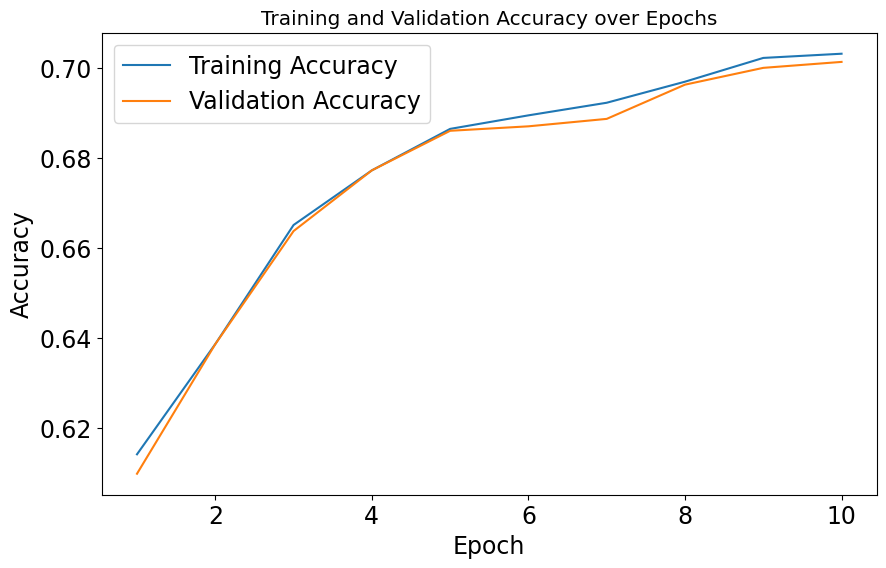

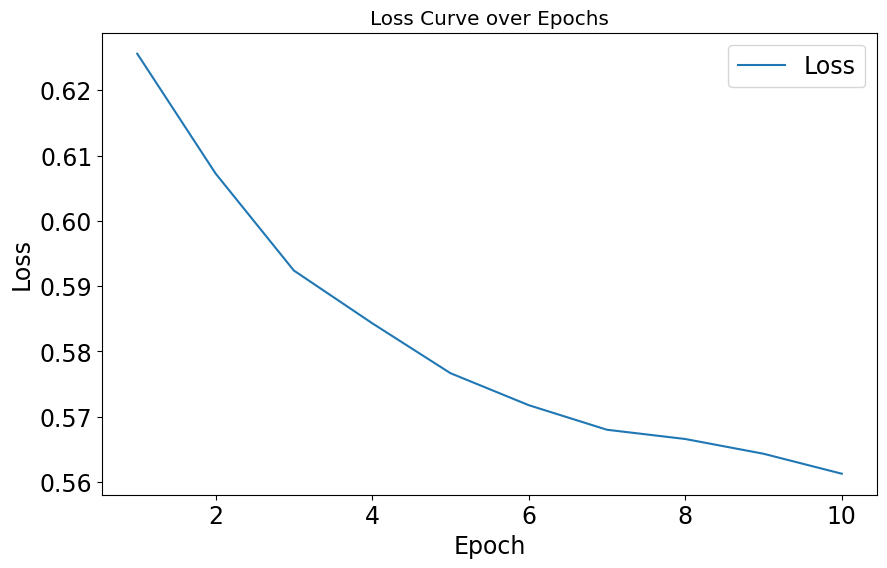

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

mlp = MLPClassifier(hidden_layer_sizes=(128, 128, 64, 32),
                    max_iter=1, random_state=42)

num_epochs = 10
n_splits = 5  # Number of folds in cross-validation

skf = StratifiedKFold(n_splits = n_splits)

X_np = np.array(X)
y_np = np.array(y)

train_accuracies = []
val_accuracies = []
loss_vals = []

for epoch in range(num_epochs):
    fold_train_accuracies = []
    fold_val_accuracies = []

    #split into training and validation sets
    for train_index, val_index in skf.split(X_np, y_np):
        X_train_fold, X_val_fold = X_np[train_index], X_np[val_index]
        y_train_fold, y_val_fold = y_np[train_index], y_np[val_index]

        # Train
        mlp.partial_fit(X_train_fold, y_train_fold, classes = np.unique(y_np))

        # Calculate training accuracy
        train_pred = mlp.predict(X_train_fold)
        train_acc_score = accuracy_score(y_train_fold, train_pred)
        fold_train_accuracies.append(train_acc_score)

        # Calculate validation accuracy
        val_pred = mlp.predict(X_val_fold)
        val_acc_score = accuracy_score(y_val_fold, val_pred)
        fold_val_accuracies.append(val_acc_score)

    # Average across all folds
    avg_train_acc = np.mean(fold_train_accuracies)
    avg_val_acc = np.mean(fold_val_accuracies)

    # Store the averages
    train_accuracies.append(avg_train_acc)
    val_accuracies.append(avg_val_acc)
    loss_vals.append(mlp.loss_)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {mlp.loss_:.4f}, Train Accuracy: {avg_train_acc:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

# Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_vals, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve over Epochs')
plt.legend()
plt.show()

#Classification Report

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      4694
           1       0.73      0.72      0.73      5302

    accuracy                           0.71      9996
   macro avg       0.71      0.71      0.71      9996
weighted avg       0.71      0.71      0.71      9996



##Scatterplots with classifications

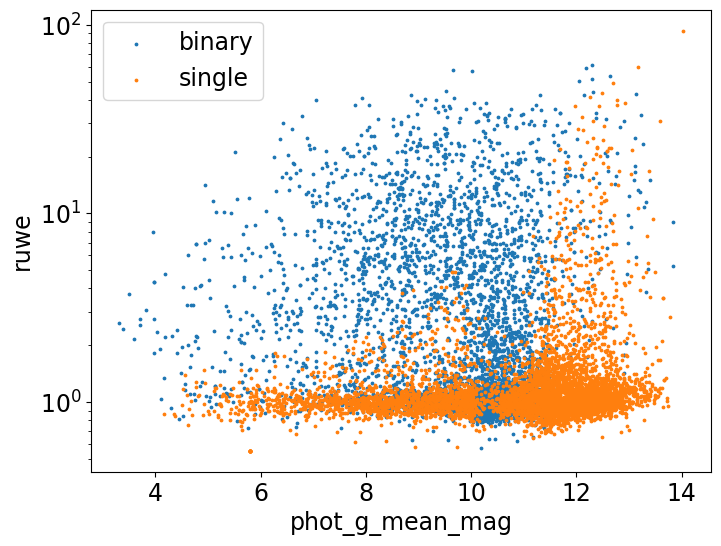

In [27]:
mask1 = y_pred == 1

plt.figure(figsize=(8, 6))

plt.scatter(X_test['phot_g_mean_mag'][~mask1], X_test['ruwe'][~mask1], s=3, label ='binary')
plt.scatter(X_test['phot_g_mean_mag'][mask1], X_test['ruwe'][mask1], s=3, label = 'single')
plt.xlabel('phot_g_mean_mag')
plt.ylabel('ruwe')

plt.yscale('log')
plt.legend()
plt.show()

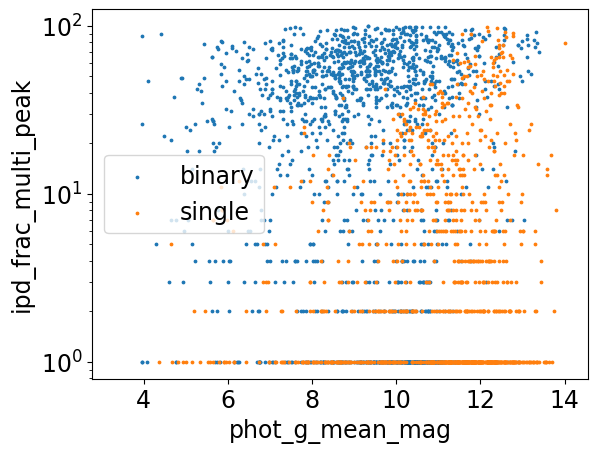

In [33]:
mask1 = y_pred == 1

plt.scatter(X_test['phot_g_mean_mag'][~mask1], X_test['ipd_frac_multi_peak'][~mask1], s=3, label ='binary')
plt.scatter(X_test['phot_g_mean_mag'][mask1], X_test['ipd_frac_multi_peak'][mask1], s=3, label = 'single')
plt.xlabel('phot_g_mean_mag')
plt.ylabel('ipd_frac_multi_peak')
plt.yscale('log')
plt.legend()
plt.show()

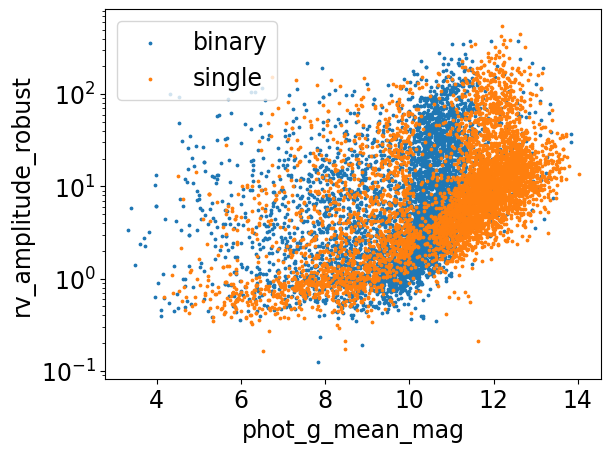

In [32]:
mask1 = y_pred == 1

plt.scatter(X_test['phot_g_mean_mag'][~mask1], X_test['rv_amplitude_robust'][~mask1], s=3, label ='binary')
plt.scatter(X_test['phot_g_mean_mag'][mask1], X_test['rv_amplitude_robust'][mask1], s=3, label = 'single')
plt.xlabel('phot_g_mean_mag')
plt.ylabel('rv_amplitude_robust')
plt.yscale('log')
plt.legend()
plt.show()

#Hyperparameters Tuning

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [
        (256,128, 64, 32),
        (128,64, 32),
        (128,128, 64, 32),
        (128, 64),
        (64,32),
        (64,)
    ],
    'activation': [
        'relu',
         'tanh',
        'logistic',
    ],
    'solver': [
        'adam',
        'sgd',
        'lbfgs'
    ],
    'alpha': [
        0.001,
        0.0001,
        0.01
    ],
    'learning_rate': [
        'constant',
    ],
    'learning_rate_init': [
        0.01,
    ]
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs= -1, cv= 5)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

y_proba, y_pred = y_test, clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_proba, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}
Results on the test set:
              precision    recall  f1-score   support

           0       0.82      0.15      0.26      4694
           1       0.56      0.97      0.71      5302

    accuracy                           0.59      9996
   macro avg       0.69      0.56      0.48      9996
weighted avg       0.68      0.59      0.50      9996



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [34]:
test_data = Table.read('/content/drive/MyDrive/Colab Notebooks/TrainingSet/main_non_rep_garchive.vot')

test_data = test_data.to_pandas()
test_data.columns

Index(['main_non_rep_oid', 'source_id', 'Mass', 'Per', 'Rad', 'ra', 'dec',
       'ruwe', 'reference', 'logAge', 'SpType', 'Lstar', 'rv_amplitude_robust',
       'ipd_frac_multi_peak', 'parallax', 'pm', 'pmra', 'pmdec',
       'phot_g_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'ruwe_2', 'ruwe_f', 'ipd_f', 'rv_robust_old_bin', 'rv_amp_f'],
      dtype='object')

In [35]:
test_data.isnull().sum()

,0
main_non_rep_oid,0
source_id,0
Mass,208
Per,0
Rad,47
ra,0
dec,0
ruwe,18
reference,0
logAge,1007


In [36]:
test_data_remove_null = test_data[(~test_data['ruwe'].isnull()) * (~test_data['phot_g_mean_mag'].isnull()) * (~test_data['bp_rp'].isnull()) * (~test_data['rv_amplitude_robust'].isnull())]
test_data_remove_null

,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,...,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f
0,1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,NaN,...,9.959853,12.960726,3.120290,10.285248,1.324547,1.297716,0,0,1,0
1,2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,NaN,...,-181.754702,11.530065,2.390316,-0.637240,0.210279,1.381918,0,1,1,0
2,3,2779735823615714176,0.30,34.01,0.32,9.89131,14.90545,1.462,Newton17,NaN,...,34.948943,12.900315,2.784772,3.501043,0.758659,1.462350,1,0,1,0
3,4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.760,Newton17,NaN,...,29.746753,12.961825,3.067182,4.048840,1.902625,9.759859,1,0,1,0
8,9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,NaN,...,-157.914132,9.984372,1.800817,4.228812,0.160593,1.149054,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1803,3828238392559860992,0.50,23.00,0.49,153.07362,-3.74566,1.034,Shan,NaN,...,-243.692955,8.331761,2.234489,7.366076,0.171652,1.033861,0,1,1,0
1803,1804,762815470562110464,0.39,56.15,0.40,165.83414,35.96988,0.964,Shan,NaN,...,-4776.588719,6.551172,2.215609,-85.110641,0.131003,0.963849,0,0,1,0
1804,1805,2257597439718033536,0.15,0.52,0.16,274.73847,66.19258,1.287,Shan,NaN,...,-442.789688,11.911708,3.128858,5.468079,0.352594,1.286515,0,0,1,0
1805,1806,6794047652729201024,0.61,4.89,0.86,311.28972,-31.34090,0.927,Shan,NaN,...,-360.147719,7.843440,2.111324,-6.897663,0.366353,0.927357,0,0,1,1


In [37]:
nlist = ['phot_g_mean_mag', 'bp_rp', 'ruwe', 'ipd_frac_multi_peak', 'rv_amplitude_robust']

X_unseen = test_data_remove_null[nlist]
X_unseen_fitted = scaler.transform(X_unseen)
X_unseen_fitted

array([[ 1.53785058,  3.78772784, -0.30551562, -0.3510359 ,  0.16632337],
       [ 0.71412847,  2.4943003 , -0.28862294, -0.23874049, -0.4130531 ],
       [ 1.50306843,  3.19322969, -0.27253466, -0.3510359 , -0.09227007],
       ...,
       [ 0.93386465,  3.80290899, -0.30772776, -0.2948882 , -0.06318   ],
       [-1.40849462,  1.99995988, -0.38012498, -0.2948882 , -0.31369608],
       [ 0.19866803,  3.3509859 , -0.33186017, -0.12644508, -0.145099  ]])

In [38]:
y_pred_unseen = mlp.predict(X_unseen_fitted)
y_pred_unseen

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [39]:
test_data_remove_null['flag'] =  y_pred_unseen
test_data_remove_null

<ipython-input-39-b454c644deb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_remove_null['flag'] =  y_pred_unseen


,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,...,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,flag
0,1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,NaN,...,12.960726,3.120290,10.285248,1.324547,1.297716,0,0,1,0,1
1,2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,NaN,...,11.530065,2.390316,-0.637240,0.210279,1.381918,0,1,1,0,1
2,3,2779735823615714176,0.30,34.01,0.32,9.89131,14.90545,1.462,Newton17,NaN,...,12.900315,2.784772,3.501043,0.758659,1.462350,1,0,1,0,1
3,4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.760,Newton17,NaN,...,12.961825,3.067182,4.048840,1.902625,9.759859,1,0,1,0,0
8,9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,NaN,...,9.984372,1.800817,4.228812,0.160593,1.149054,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1803,3828238392559860992,0.50,23.00,0.49,153.07362,-3.74566,1.034,Shan,NaN,...,8.331761,2.234489,7.366076,0.171652,1.033861,0,1,1,0,0
1803,1804,762815470562110464,0.39,56.15,0.40,165.83414,35.96988,0.964,Shan,NaN,...,6.551172,2.215609,-85.110641,0.131003,0.963849,0,0,1,0,0
1804,1805,2257597439718033536,0.15,0.52,0.16,274.73847,66.19258,1.287,Shan,NaN,...,11.911708,3.128858,5.468079,0.352594,1.286515,0,0,1,0,1
1805,1806,6794047652729201024,0.61,4.89,0.86,311.28972,-31.34090,0.927,Shan,NaN,...,7.843440,2.111324,-6.897663,0.366353,0.927357,0,0,1,1,0


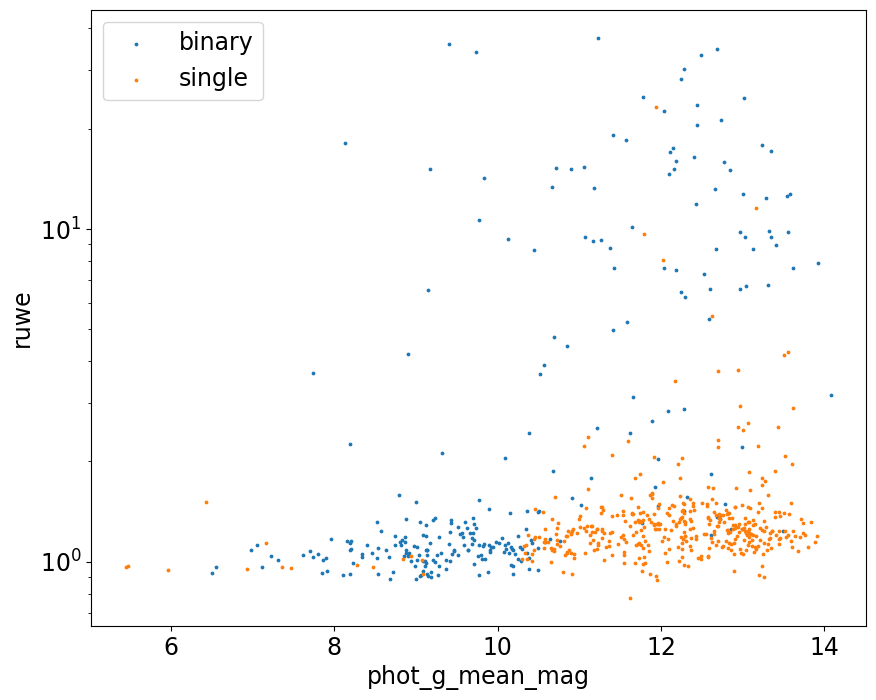

In [41]:
mask1 = test_data_remove_null['flag'] == 1

plt.figure(figsize=(10, 8))

plt.scatter(X_unseen['phot_g_mean_mag'][~mask1], X_unseen['ruwe'][~mask1], s=3, label ='binary')
plt.scatter(X_unseen['phot_g_mean_mag'][mask1], X_unseen['ruwe'][mask1], s=3, label = 'single')
plt.xlabel('phot_g_mean_mag')
plt.ylabel('ruwe')
plt.yscale('log')
plt.legend()
plt.show()